# Case Study on ANOVA

In [ ]:
XYZ Company has offices in four different zones. The company wishes to
investigate the following :
● The mean sales generated by each zone.
● Total sales generated by all the zones for each month.
● Check whether all the zones generate the same amount of sales.
Help the company to carry out their study with the help of data provided.

In [2]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Read the Sales_data_zone_wise to the python environment.
# Loading the CSV file into a pandas dataframe.
data= pd.read_csv(r'C:\ict\Assignments\6.Case study 5 on ANOVA\Sales_data_zone_wise.csv')
data

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062
5,Month - 6,1534390,1573128,1751825,2292044
6,Month - 7,1820196,1992031,1786826,1688055
7,Month - 8,1625696,1665534,2161754,2363315
8,Month - 9,1652644,1873402,1755290,1422059
9,Month - 10,1852450,1913059,1754314,1608387


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


In [52]:
# Use describe funtion to find the statistics of different columns.
data.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


In [53]:
data.columns

Index(['Month', 'Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'], dtype='object')

In [ ]:
# Here, there are four treatments ('Zone - A', 'Zone - B', 'Zone - C',and 'Zone - D'),
# Which are groups for ANOVA analysis. 
# Treatments are independent variable and termed as factor. 
# As there are four types of treatments, treatment factor has four levels.

# ● The mean sales generated by each zone.

In [54]:
mean_sales=data.mean()
mean_sales

Zone - A    1.540493e+06
Zone - B    1.755560e+06
Zone - C    1.772871e+06
Zone - D    1.842927e+06
dtype: float64

In [ ]:
Conclusion
#The mean sales generated by each zone:
#Zone-A = 1.540493e+06
#Zone-B = 1.755560e+06
#Zone-C = 1.772871e+06
#Zone-D = 1.842927e+06

# ● Total sales generated by all the zones for each month.

In [56]:
#The Total sales generated by all the 4 zones for each month:
data['Total']=data['Zone - A']+data['Zone - B']+data['Zone - C']+data['Zone - D']
data

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210


# ● Check whether all the zones generate the same amount of sales.

In [ ]:
for this case study, there is only factor (treatments) or independent variable to evaluate,
and therefore, one-way ANOVA method is suitable for analysis.
# There are 4 independent variables(Zone-A,Zone-B,Zone-C,and Zone-D).
# To compare the mean of them-consider one-way ANOVA

In [ ]:
HYPOTHESIS
# Null Hypothesis H0:The mean of the amount of sales generated by Zone-A,Zone-B,Zone-C,and Zone-D are same.
# Alternative Hypothesis H1:The mean is not same.

In [ ]:
# One-way ANOVA can be performed by scipy.stats.f_oneway function in scipy

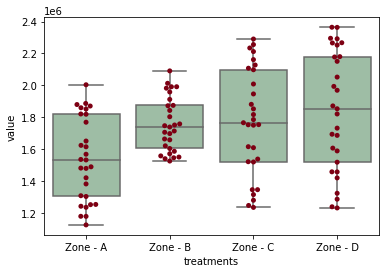

In [41]:
# reshape the d dataframe suitable for statsmodels package 
data_melt = pd.melt(data.reset_index(), id_vars=['index'], value_vars=['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'])
# replace column names
data_melt.columns = ['index', 'treatments', 'value']
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=data_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=data_melt, color='#7d0013')
plt.show()

In [57]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(data['Zone - A'],data['Zone - B'],data['Zone - C'],data['Zone - D'])

print('fvalue =',fvalue)
print('pvalue =',pvalue)

fvalue = 5.672056106843581
pvalue = 0.0011827601694503335


In [58]:
print('fvalue =',round(fvalue,3))
print('pvalue =',round(pvalue,3))

fvalue = 5.672
pvalue = 0.001


In [33]:
# Calculate the critical value
# alpha = 0.05
# critical_value= scipy.stats.f(dfn, dfd).ppf(q)
# dfn:Numerator degrees of freedom(the number of factor levels minus one)
# As there are four types of treatments, treatment factor has four levels.
# dfn=4-1=3
# dfd:Denominator degrees of freedom(subtracting the number of sample groups from the total number of samples tested.)
# dfd=29*4-4=112
# q=1-alpha
# q=1-0.05

In [59]:
import scipy
critical_value=scipy.stats.f(3,112).ppf(1-0.05)
critical_value
print('critical_value =',round(critical_value,3))

critical_value = 2.686


In [60]:
if np.abs(fvalue)>np.abs(critical_value) and pvalue<0.05:
    print("Reject Null Hypothesis H0")
else:
    print("Reject Alternative Hypothesis H1")

Reject Null Hypothesis H0


In [ ]:
Output
#fvalue = 5.672
#pvalue = 0.001
 Conclusion
# From the above output results, we see that 
#fvalue=(5.672) is > critical_value=(2.686) and
#the p-value is less than 0.05.
#p-value=(0.001) < alpha=(0.05),hence we can reject the null hypothesis H0.
# So we can conclude that: 
#        "The mean of the amount of sales generated by Zone-A,Zone-B,Zone-C,and Zone-D are not same".
# The amount of sales generated by each zones are not same.